<div align="center">
<h1><b>Chapter-4 Training Models</b></h1>
</div>

## Linear Regression:

- linear regression is a machine learning algorithm that predicts a continuous numerical value by finding the best fitting straight line or (flat plane/hyperplane in higher dimensions) relationship between the input-features and the output.

$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n $$

* $\hat{y}$ is the predicted value.
* $n$ is the number of features.
* $x_i$ is the $i^{th}$ feature value.
* $\theta_j$ is the $j^{th}$ model parameter, including the bias term $\theta_0$ and the feature weights $\theta_1, \theta_2, \dots, \theta_n$.
Each feature and its weight in the formula gives partial prediction and the total prediction is the whole sum.

- base or $\theta_0$ is the value of y at x=0.  
- weights is like "how much importance" each feature contributes to the whole prediction.

Vectorized form of linear regression model prediction

$$ \hat{y} = h_\theta(\mathbf{x}) = \mathbf{\theta} \cdot \mathbf{x} $$

* $h_\theta$ is the hypothesis function(gives the prediction), using the model parameters $\mathbf{\theta}$.
* $\mathbf{\theta}$ is the model's *parameter vector*, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$.
* $\mathbf{x}$ is the instance's *feature vector*, containing $x_0$ to $x_n$, with $x_0$ always equal to 1.
* $\mathbf{\theta} \cdot \mathbf{x}$ is the dot product of the vectors $\mathbf{\theta}$ and $\mathbf{x}$, which is equal to $\theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$.


Training a model means setting its parameters so that the model best fits the training set. So to do this first we need to measure how well or poorly the model fits the training data.
we can use MSE(Mean squared error) performance measure.
### Equation 4-3. MSE cost function for a linear regression model
$$ \text{MSE}(\mathbf{X}, h_\theta) = \frac{1}{m} \sum_{i=1}^{m} (\theta^T \mathbf{x}^{(i)} - y^{(i)})^2 $$

Cost function : A cost function (or loss function) is a function that measures how poorly a machine learning model is performing.

### The Normal Equation:

It is a mathematical equation to find the θ that minimizes the MSE.

$$ \hat{\theta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} $$

 
 • θ is the value of θ that minimizes the cost function.  
 • y is the vector of target values containing y(1) to y(m)

In [1]:
# First we will create a linear looking data to test the equation:

import numpy as np

np.random.seed(42)

# m is the number of instances or the number of rows in the data
m = 100

# now we will create an array of 100(m) rows and 1 column i.e., a column vector
# a column vector is a vector that has only one columns and multiple rows.
X = 2 * np.random.rand(m, 1) # .rand gives uniform distribution between 0-1

# Now we will create lables for the data
y = 4 + 3*X + np.random.randn(m, 1) # .randn gives normal distribution or gaussian noise

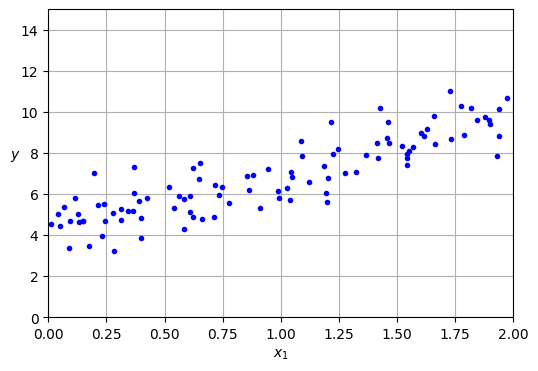

In [2]:
# First we will se how this data looks in the graph
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()


In [3]:
# Now we will use the noraml equation on our random generated data

# Add dummy feature - a feature column in the data that contains all values as 1.
from sklearn.preprocessing import add_dummy_feature

# addint dummy feature column to X training data vector
X_b = add_dummy_feature(X) # Add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T@y

In [4]:
# Now we can see what theta_best we get from the normal equation
theta_best

array([[4.21509616],
       [2.77011339]])

In [5]:
# Now we can make predictions using the theta best in place of theta features.

# First take new data for testing
X_new = np.array([[0], [2]])
# Add dummy feature
X_new_b = add_dummy_feature(X_new)
# Now setting formula to get predicted value
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

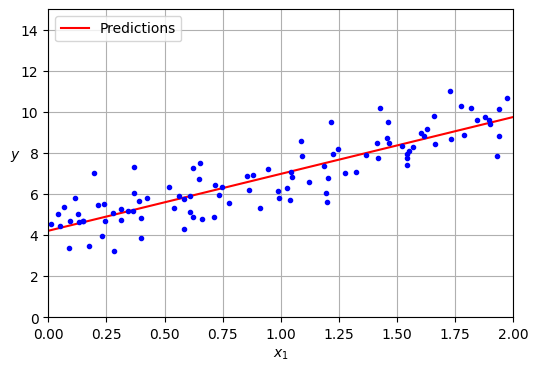

In [6]:
# Now we will plot the models prediction
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()

In [7]:
# Scikit learn provides LinearRegression model which works same but uses pseudoinverse rather than normal equation.
# But it seprates the bias tems(intercep_) with the weights(coef_).
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y) # it automatically adds dummy feature inside
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [8]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [9]:
# The LinearRegression class is based on scipy least squares function.

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

__Moore-penrose-pseudoinverse__ : 
This function computes $\hat{\theta} = \mathbf{X}^+ \mathbf{y}$, where $\mathbf{X}^+$ is the *pseudoinverse* of $\mathbf{X}$ (specifically, the Moore–Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

where $\hat{\theta}$ is the best value.

- It works same as normal equation but it also works where normal equation fails.
- Normal equation doesn't works when $(\mathbf{X}^T \mathbf{X})$ is invertible.

This pseudoinverse itself is computed using a standard matrix factorization technique called 
singular value decomposition(SVD) that breaks the matrix(X) into three matrices $\mathbf{V}\Sigma\mathbf{U}^T$.  
Where,  
$\mathbf{V}$ is a m x m matrix of left singular vectors,  
$\Sigma$ is a m x n diagonal matrix ,  
$\mathbf{U}^T$ is a n x n matrix of right singular vectors.

Then the *pseudoinverse* is calculated as $ \mathbf{X}^+ = \mathbf{V}\Sigma^+\mathbf{U}^T.$
- Take the reciprocal of every non-zero singular value. and then transpose the sigma matrix that is its pseudoinverse.
- However we can't apply this reciprocal and transpose directy to X matrix as it is not a diagonal matrix.

__Comutational Complexity__: - **Normal Equation**: Complexity is about `O(n^3)` due to matrix inversion, making it slow for many features.
- **SVD (used by Scikit-Learn)**: Faster and more stable with `O(n^2)` complexity.
- Both handle large datasets well if they fit in memory (`O(m)` w.r.t. number of instances).
- **Predictions**: Fast (`O(m × n)`).
- For huge features/data: use **Gradient Descent**.


## Gradient Descent:

Gradient descent is a generic optimization algorithm used to minimize the cost/loss function in machine learning models by adjusting the model parameters (θ values) step by step.

learning rate hyperparameter : This parameter in gradient descent determines the size of the steps, if it is too small the the model will take much time, if it is too large then it might corss the downhill.

There are also irregular function where gradient descent might stuck at local minimum.

- However MSE cost function is a convex function, which means the line joining any two points on the curve is always below the curve. so there is no local minimum there is only a global minimum , so gradient descent will work perfectly.

### Batch Gradient Descent:

In this type of gradient descent , the gradient of the cost function is computed with regard to each model parameter $\theta_j$ i.e., we need to calculate the partial derivative.  
In batch gradient descent at each step of finding $\theta_j^*$ best values we need to calculate the cost function for full data.

Partial derivatives of the cost function-
$$ \frac{\partial}{\partial \theta_j} \text{MSE}(\mathbf{\theta}) = \frac{2}{m} \sum_{i=1}^{m} (\mathbf{\theta}^T \mathbf{x}^{(i)} - y^{(i)}) x_j^{(i)} $$

The gradient vector of the cost function contains all partial derivatives-
$$
\nabla_\theta \text{MSE}(\mathbf{\theta}) =
\begin{pmatrix}
 \frac{\partial}{\partial \theta_0} \text{MSE}(\mathbf{\theta}) \\
 \frac{\partial}{\partial \theta_1} \text{MSE}(\mathbf{\theta}) \\
 \vdots \\
 \frac{\partial}{\partial \theta_n} \text{MSE}(\mathbf{\theta})
\end{pmatrix}
= \frac{2}{m} \mathbf{X}^T (\mathbf{X}\mathbf{\theta} - \mathbf{y})
$$

- After getting the gradient vector , we just need to go in opposite direction with a learning rate n.
#### Gradient descent step
$$ \mathbf{\theta}^{(\text{next step})} = \mathbf{\theta} - \eta \nabla_\theta \text{MSE}(\mathbf{\theta}) $$

In [10]:

# Setting the learning rate to 0.1
eta = 0.1 

# number of iterations, we are setting total 1000 iterations
n_epochs = 1000

# it is the number of instances or rows
m = len(X_b)

np.random.seed(42)
# getting theta randomly, a current position or a position to start with
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[4.21509616],
       [2.77011339]])

__Convergence Rate__: Gradient Descent converges to the optimal solution, but getting very close (within a small error ε) can take a long time. The number of steps grows as O(1/ε), meaning 10× more precision needs ~10× more steps. Near the minimum, gradients become small, so updates slow down and convergence becomes slower.

### Stochastic Gradient Descent : 

Stochastic Gradient Descent is an optimization algorithm that updates model parameters by computing the gradient using only one randomly choose datapoint at a time, instead of the entire dataset.


In [12]:
n_epochs = 50
t0, t1 = 5, 50

# creating a function which decreases with increase in value 
def learning_schedule(t):
    return t0/(t+t1)


np.random.seed(42)
# generating a random position
theta = np.random.randn(2, 1)

# for each number of epoch 
for epoch in range(n_epochs):
    # for m number of rows
    for iteration in range(m):
        # selecting a random index between 0-100 from the data
        random_index = np.random.randint(m)
        # selecting the random index row from training set and labels
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        # Calculating gradient for randomly selected index(only one row) 
        gradients = 2 * xi.T @ (xi @ theta - yi) # do not use /m in SGD
        # eta ensures a stable learning rate that decreases over each iteration
        eta = learning_schedule(epoch * m + iteration)
        # calculating the updated theta
        theta = theta - eta * gradients

In [13]:
theta

array([[4.21076011],
       [2.74856079]])

In [14]:
# We can also use SGDRegressor from scikit-learn.
from sklearn.linear_model import SGDRegressor

# max_iter is the maximum number of iterations the model can perform, tol is the tolerance level 
#   if the model do not imporve by atleat 0.000001 then it considers training good enough and stop early,
#     eta) is the starting learning rate, n_iter_no_change if there is no improvements for 100 
#       rounds then training is stopped.
sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100
                       , random_state=42)
# Y is initially a 2D array so we used .ravel to flatten it to 1D array, because the .fit expects 
#    Y as a 1D array and X as a 2D array.
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

### Mini-Batch Descent:
In this type of Gradient Descent we use random mini batches to find the gradients. Unlike BGD in which full traning set is used or SGD in which just one instance is use.

The main advantage of this is ,it can get a performance boost from hardware optimization of matrix operations.

The SGDRegresspor from scikit-learn actually uses mini-batche descent rather than single instance.

## Polynomial Regression:
Polynomial regression is used when the data is not linear. We can use the linear model to fit that non linear data. A simple way to do is to add powers each input features , and then train the model on this extended set of features.

In [16]:
# First we create a non linear data
np.random.seed(42)
m=100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

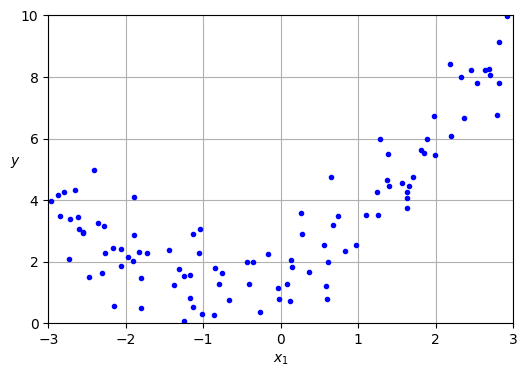

In [17]:
# extra code 
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [18]:
# As the data is is non linear ,we will add polynomial features 
#   i.e., add powers of each features by using PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]


array([-0.75275929])

In [19]:
# The first value is the original value and x and second value 0.56 is the 
#   polynomial feature or x^2 value of x
X_poly[0]

array([-0.75275929,  0.56664654])

In [20]:
# Now we will train the linearRegression model on this polynomial data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

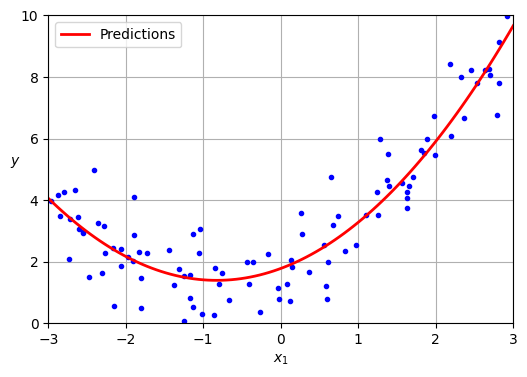

In [21]:
# We can see how the LinearModel regression has made a curve line.
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Our original function was $ y = 0.5x_1^2 + 1.0x_1 + 2.0 + \text{Gaussian noise.} $, this model extimates $ \hat{y} = 0.56x_1^2 + 0.93x_1 + 1.78 $

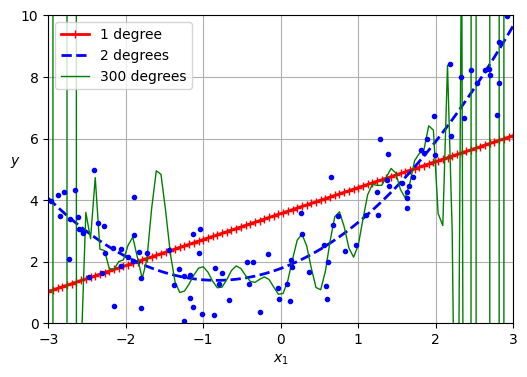

In [22]:
# A higher degree polynomial model will fit the training data more better but it may overfit.

# Now we will see comparisons between a pure linear mode a quadratic model(second-degree polynomial),
#    and a 300-degree polynomial model

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

### Learning Curves:

- We can estimate the model's generalization performance by using cross-validation.  
- Another way is to look at learning curves which are plots of models training error and validation error. If the model cannot be trained incrementally(i.e., doesn't support partial_fit() or warm_start) i.e., the model do not remember previos batches it was trained on.  
- Scikit learn provides a learning_cuve() function, which by default evaluates the model using cross-validation. But setting exploit_incremental_learning=True when calling learning_curve() will evaluate and train the model incrementally if the model supports incremental learning.

In [23]:
# We will use learning_curve to evaluate the model on the linear dataset

from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

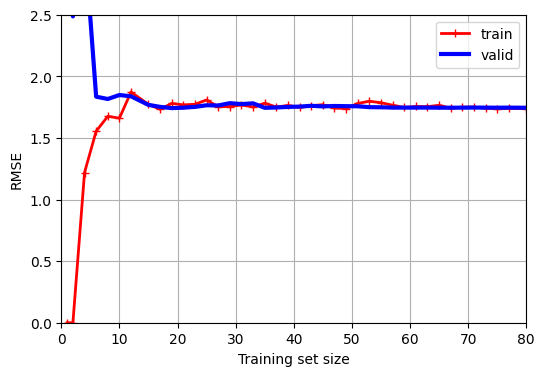

In [24]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

plt.show()

# Here we can see that the model is underfitting, because where there is only one or two data 
#  the model was at zero(means zero error and perfect prediction) ,but then it didn't perform well.
#     it is becuase we are using linearRegression on curve data

In [25]:
# Now we will see how will a 10th degree polynomial model will perform 

# Now we are creating a pipeling to first create polynomial features and then apply linearregression.
from sklearn.pipeline import make_pipeline

Polynomial_regression = make_pipeline(PolynomialFeatures(degree=10, include_bias=False), 
                                      LinearRegression())

# Now we will see error through learniing_curve function from scikit learn
# Scikit learn automatically calls predict in learning curve so the transformer will be fit_transform and t
#   the the estimator(linearregression) will be fit and then predict.
train_sizes, train_scores, valid_scores = learning_curve(
    Polynomial_regression, X, y, train_sizes=np.linspace(0.1, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

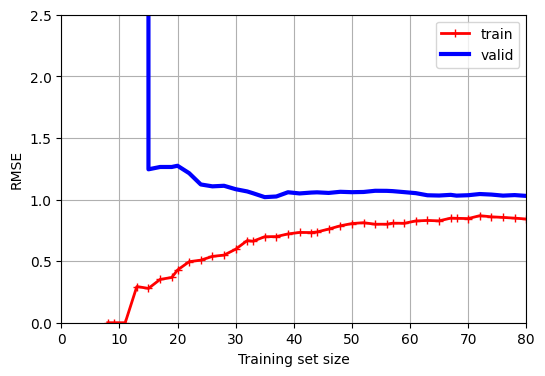

In [26]:
# Now we can see through plotting , that how this model performed on train set and validation sets

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

# we can see that the model performed better on training set than the validation set, which means
#    that the model is overfitting.

### The Bias/Variance Trade-off:

__Generalization error__ : How much worse the model performed on the new data as compared to the training data.

generalization error of a model can be expressed as the sum of three very different errors.

Bias- This part of generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model will most likely underfit the training data

Variance- It is due to the model's excessive sensitivity to small variations in the training data. A model with high degree of freedom(polynomials) is most likely overfit the training data.

Irreducible error- This part of the error is due to the noiseness of the data itself. The only way to reduce this is to clean up the data.

trade-off - increasing model complexity will increase its variance but reduce it bias, while reducing model's complexity will increases its bias and reduces variance.

## Regularized Linear Models:

Regularization is a technique used to reduce overfitting of machine learning models on the data.

In a polynomial model a simple way to regularize is by reducing the number of polynomial degrees.

For a linear model regularization is achieved by constraining the weights of the model.  
We will learn three regularization linear models - 1. ridge regression, 2. lasso regression, 3. elastic net regression- to constrain the weights.

### Ridge Regression:


It is a regularized version of linear regression; in which a regularization term equal to $ \frac{\alpha}{m} \sum_{i=1}^{n} \theta_i^2 $ is added to the MSE.

This makes the model to penalize more the large weight(parameter or theta) values and it keeps the weight to near zero. The alpha determines how much penalty is applied if it is small then less penalty is applied to large weight and if it is big then more is applied, and at aplha=0 
the model behaves like linearregression model

#### Ridge regression cost function
$$ J(\mathbf{\theta}) = \text{MSE}(\mathbf{\theta}) + \frac{\alpha}{m} \sum_{i=1}^{n} \theta_i^2 $$

#### Ridge regression closed-form solution
$$ \hat{\mathbf{\theta}} = (\mathbf{X}^T\mathbf{X} + \alpha\mathbf{A})^{-1} \mathbf{X}^T \mathbf{y} $$

In [27]:
# First we generate a small and noisy dataset
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

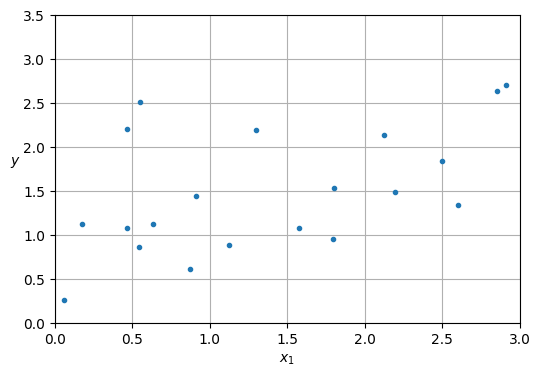

In [28]:
# We can plot this data
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [29]:
# importing Ridge model from scikit learn
from sklearn.linear_model import Ridge

# setting alpha=0.1 and problem solver="cholesky"
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

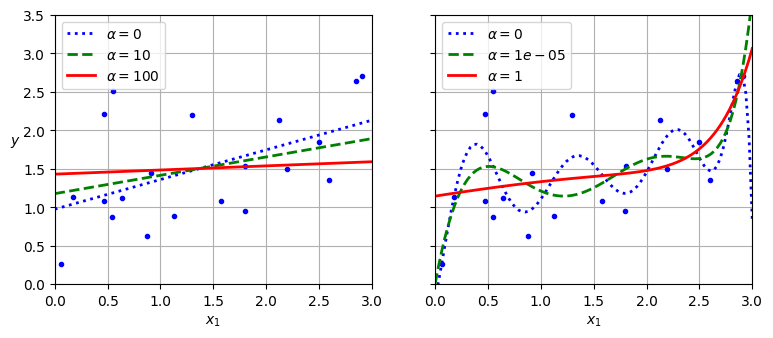

In [30]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

# There are linear model(left) and polynomial model(right) ,both with various levels of ridge regularization

In [31]:
# We can also use Ridge regularization with the stochastic gradient descent.

sgd_reg = SGDRegressor(penalty="l2", alpha=0.1/m, tol=None, max_iter=1000, eta0=0.01, 
                       random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.55302613])

## Lasso Regression:
Least absolute shrinkage or selection operator. It is another regularized version of linear regression. It uses the L1 norm, irrelevant features weights automatically reduces to zero.  
The lasso regression automatically performs feature selection and outputs a sparse model with few nonzero feature weights.

#### Lasso regression cost function
$$ J(\mathbf{\theta}) = \text{MSE}(\mathbf{\theta}) + 2\alpha \sum_{i=1}^{n} |\theta_i| $$

#### Lasso regression subgradient vector
$$
g(\mathbf{\theta}, J) = \nabla_\theta \text{MSE}(\mathbf{\theta}) + 2\alpha
\begin{pmatrix}
 \text{sign}(\theta_1) \\
 \text{sign}(\theta_2) \\
 \vdots \\
 \text{sign}(\theta_n)
\end{pmatrix}
\text{ where }
\text{sign}(\theta_i) =
\begin{cases}
 -1 & \text{if } \theta_i < 0 \\
 0 & \text{if } \theta_i = 0 \\
 +1 & \text{if } \theta_i > 0
\end{cases}
$$

In [32]:
# using lasso regression
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

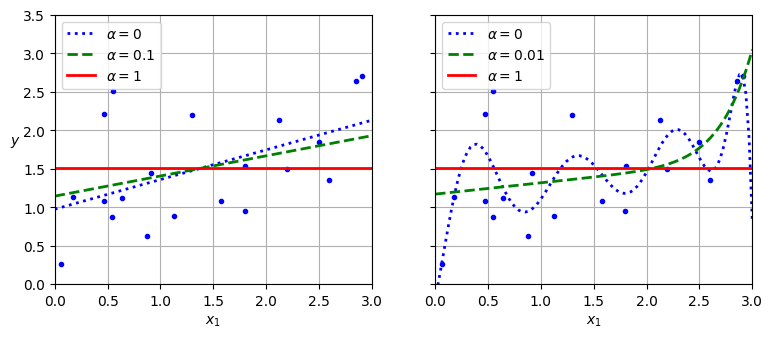

In [33]:
# generating 
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

# Linear (left) and polynomial (right) models, both using various levels of lasso regularization.

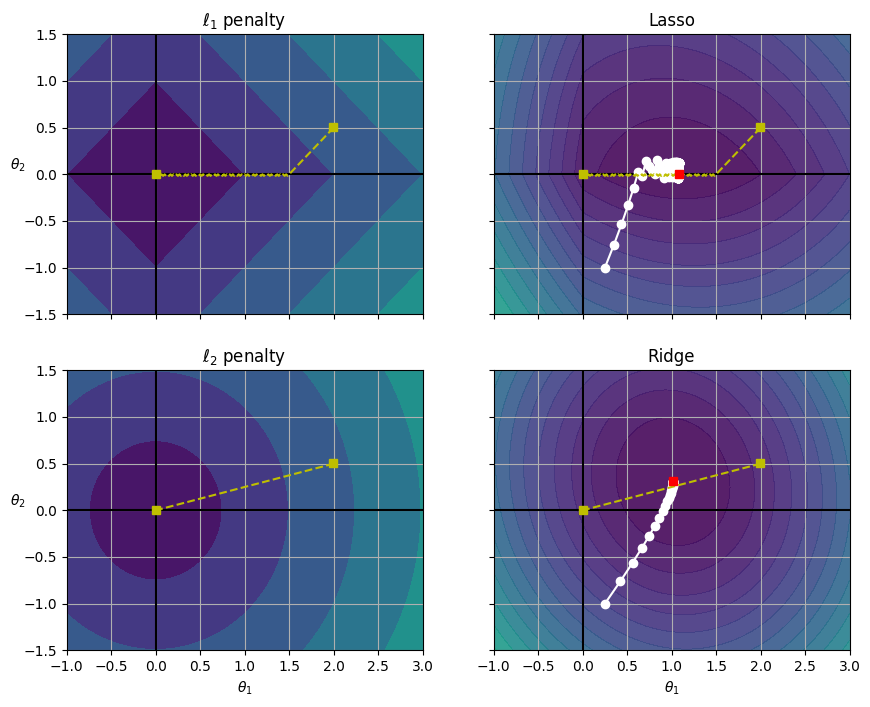

In [34]:
# Lasso versus ridge regularization
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

plt.show()
# Lasso versus ridge regularization

### Elastic Net Regression:
The regularization term for elastic net regression is the weighted sum of both ridge and lasso regularization terms. when the mix ratio r=0, it is equivalent to ridge regression and when r=1, it is equivalent to lasso.
#### Elastic net cost function
$$ J(\mathbf{\theta}) = \text{MSE}(\mathbf{\theta}) + r\left(2\alpha\sum_{i=1}^{n}|\theta_i|\right) + (1-r)\left(\frac{\alpha}{m}\sum_{i=1}^{n}\theta_i^2\right) $$


In [35]:
# Here we use Elastic net regression 
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ratio corresponds to the mix ratio r.
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early Stopping:
It is a regulatization technique to prevent overfitting, especially in iterative learning algorithms such as gradient descent.

In [36]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100 # There are total 100 rows in the data
# Training set with random values
X = 6 * np.random.rand(m, 1) - 3
# Target labels generated with random values - noisy quadratic function
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

# Creating two sets 1st training and second validatiion
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

# Creating a pipiline to first add degree and then scale values of data between 0-1 by using standard scalar.
preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
# It is the preprocessed X train set with polynomial features of degree 90
X_train_prep = preprocessing.fit_transform(X_train)
# Preprocessed X valid set with polynomial features of degree 90
X_valid_prep = preprocessing.transform(X_valid)

# creating an object of the SGDRegressor 
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
# We will use 500 iterations
n_epochs = 500
# The best_valid_rmse start with best possible highest value, as the inf represents the infinity.
best_valid_rmse = float('inf')

train_errors, val_errors = [], [] ## ----  for the figure only not in code

# This loop will run 500 times
for epoch in range(n_epochs):
    # We are fitting it partially so it trains on the training set each time and also remembers 
    #   it each time
    sgd_reg.partial_fit(X_train_prep, y_train)
    # Now we are predicting the validation set
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    # We are using rmse performance measure that weights the large errors more
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    # if the val_error is less the best valid rmse the it runs
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error # each time this block runs the best_valid_rmse value is updated as val_error
        # deepcopy copies both the model hyperparameters and learned parameters, while
        #    sklearn.base.clone only copies the model's hyperparameters
        best_model = deepcopy(sgd_reg) # this will make the full copy of the sgd_red model

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error) 

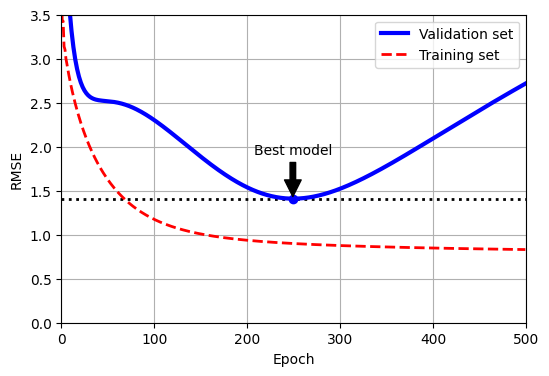

In [37]:
# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()

# We can see in the graph that at ceratain level the RMSE is minimum and after that it start increasing again.

## Logistic Regression:
Logistic regression is a binary classifier, it is used to predict if an instance belongs to a particular positive class(1) or not(negative class - 0).
It sets a threshold(typically 50%), if the probability is higher than that then it predicts.

#### Estimating Probabilities: 
Just like linear regression model, a logistic regression model computes a weighted sum of the input features and bias term, but instead of giving them directly it outputs the logistic of the result.
##### Logistic regression model estimated probability (vectorized form)
$$ \hat{p} = h_\mathbf{\theta}(\mathbf{x}) = \sigma(\mathbf{\theta}^T \mathbf{x}) $$
##### Logistic function
$$ \sigma(t) = \frac{1}{1 + \exp(-t)} $$
where sigma is the sigmoid function that outputs between 0 and 1

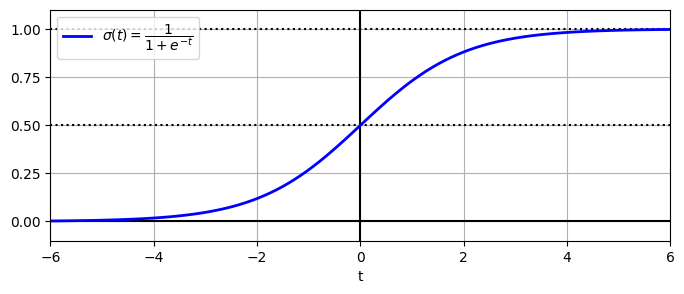

In [38]:
lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

### Training and Cost Function:
The objective for training is to set the parameter vector Theta so that the model estimates high probabilities for positive instances(y = 1) and low probabilites for low instances(y = 0).
##### Cost function of a single training instance-
$$
c(\mathbf{\theta}) =
\begin{cases}
 -\log(\hat{p}) & \text{if } y = 1 \\
 -\log(1 - \hat{p}) & \text{if } y = 0
\end{cases}
$$
##### Logistic regression cost function (log loss)
$$ J(\mathbf{\theta}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)}\log(\hat{p}^{(i)}) + (1 - y^{(i)})\log(1 - \hat{p}^{(i)}) \right] $$

This cost function has no closed form equation to calculate the best theta values, but this cost function is convex so gradient descent will work surely.

The partial derivatives of cost function with regard to the jth model parameter  θj is given by,
##### Logistic cost function partial derivatives-
$$ \frac{\partial}{\partial\theta_j}J(\mathbf{\theta}) = \frac{1}{m}\sum_{i=1}^{m}\left(\sigma(\mathbf{\theta}^T\mathbf{x}^{(i)}) - y^{(i)}\right)x_j^{(i)} $$
After getting all the gradient vector containing all the partial derivatives, we can use it in gradient descent algorithms(stochastic or batch or mini batch etc.)

### Decision Boundaries:
A decision boundary is the point on the input features at which the model's probability is equal to the threshold.  
For example- for the input features(petal width) at the value 1.6 the probability is 0.5 , so 1.6 is the decision boundary for this binary classification model.

the value at which probability is exactly equal to the threshold value is called the decision boundary. so threshold is a point on the probability and decision boundary is a poing on the input features



In [39]:
# first we will load the iris dataset 
from sklearn.datasets import load_iris
# Getting the iris dataset as a pandas dataframe, initially it come as numpy array so we use as_frame=True 
#     to get the pandas dataframe
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [40]:
iris.data.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [41]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
# Now we are going to apply binary classification using LogisticRegression to check if a 
#   flowe is virginica or not using the petal width feature.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
# creating boolean y set - 1 for virginica and 0 if not
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [43]:
# Creates 1000 evenly spaced numbers between 0-3
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

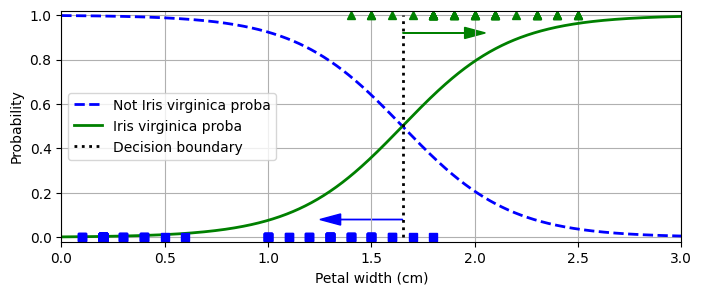

In [ ]:
plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()
# Here we can see that at petal width=1.6 the probability is 0.5, and smaller width has less probabilities,
#     while the greater the width the higher the probability.

In [45]:
decision_boundary

1.6516516516516517

In [46]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

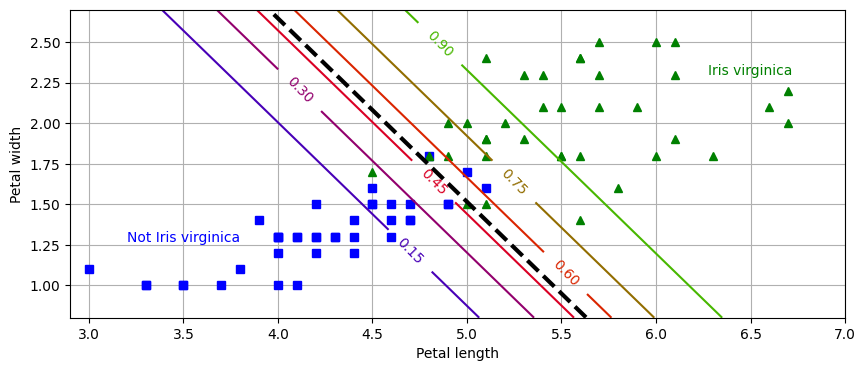

In [ ]:
# extra code – this cell generates and saves Figure 4–24

# Creating two feature figure
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()
# This represents the probability with regards to these two features, the dashed line is the 
#   decision boundary and other parallel lines are the probabilites between 15-90

### Softmax Regression:
Softmax regression or multinomial logistic regression is a generalized algorithm that used when we need to choose a single class from three or more possible options. without having to train and combine multiple binary classifiers.

How it works:
First it passes the given input to the softmax score function for each class , and it gets score not yet probabilities, each class has its own parameter vector θ(k) and all these vectors are stored as rows in the parameter matrix Θ.
##### Softmax score for class k-
$$ s_k(\mathbf{x}) = (\mathbf{\theta}^{(k)})^T \mathbf{x} $$

Then it calculates the probabilites based on that scores by passing them through the softmax function. Then it stores the probabilities and predicts the higheset probability using argmax function.
##### Softmax function-
$$ \hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^{K}\exp(s_j(\mathbf{x}))} $$
In this equation:

* $K$ is the number of classes.
* $\mathbf{s}(\mathbf{x})$ is a vector containing the scores of each class for the instance $\mathbf{x}$.
* $\sigma(\mathbf{s}(\mathbf{x}))_k$ is the estimated probability that the instance $\mathbf{x}$ belongs to class $k$, given the scores of each class for that instance.

#### Cross Entropy:
It is a cost function used to measure how well a models predicted probabilities match the actual class labels. It penalizes the low probability for a target.
##### Cross entropy cost function-
$$ J(\mathbf{\Theta}) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}y_k^{(i)}\log(\hat{p}_k^{(i)}) $$
##### Cross entropy gradient vector for class k-
$$ \nabla_{\mathbf{\theta}^{(k)}} J(\mathbf{\Theta}) = \frac{1}{m}\sum_{i=1}^{m} (\hat{p}_k^{(i)} - y_k^{(i)}) \mathbf{x}^{(i)} $$

In [48]:
# Now we will use softmax regression , Scikit learn's LogisticRegression classifier autmatically
#   uses softmax regression when we train it on more than two classes.
# It uses solver="lbfgs" and regularization l2(ridge regression) by default.
# We can control the regularization strength by hyperparameter C.

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)


softmax_reg.predict([[5, 2]])

array([2])

In [49]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

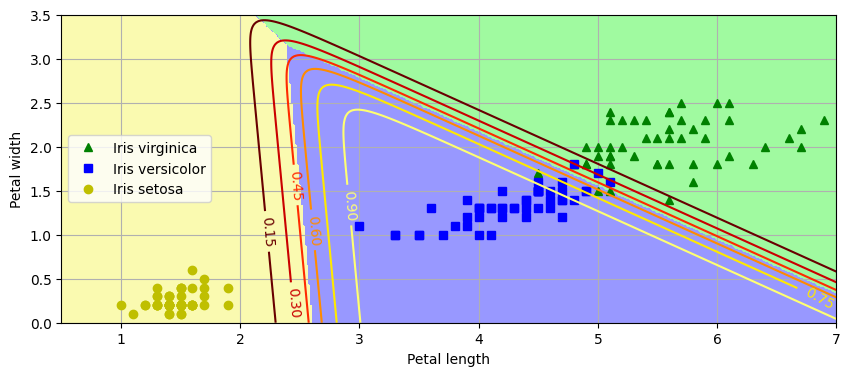

In [50]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()